# Load packages

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST train, test dataset 가져오기

In [3]:
#"": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),
                      target_transform=None, download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),
                      target_transform=None, download=True)

# 대략적인 데이터 형태

mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


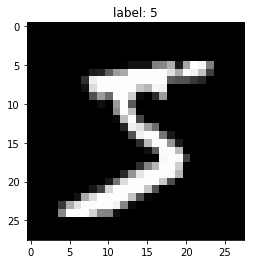

In [4]:
print "mnist_train 길이: ", len(mnist_train)
print "mnist_test 길이: ", len(mnist_test)

#데이터 하나 형태
image, label = mnist_train.__getitem__(0)
print "image data 형태: ", image.size()
print "label: ", label

#그리기
img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

# MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


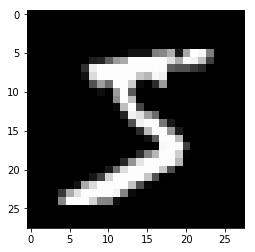

0


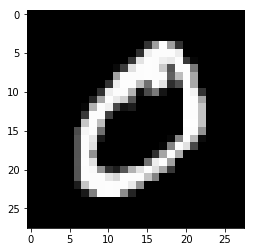

4


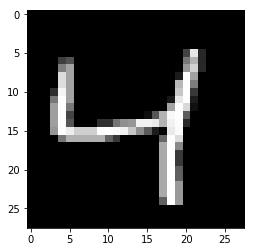

In [5]:
print(mnist_train[0][1]) #label
print(mnist_train[0][0].size()) #image

for i in range(3):
    img=mnist_train[i][0].numpy() #image
    print(mnist_train[i][1]) #label
    plt.imshow(img[0],cmap='gray')
    plt.show()

# convolution 하나 씌워보기

5
torch.Size([1, 3, 28, 28])


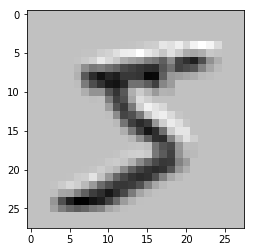

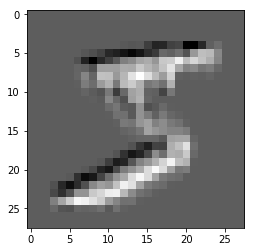

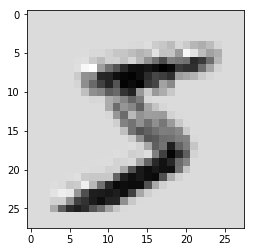

In [6]:
#mnist의 첫 번째 이미지, 라벨 가져오기
image, label = mnist_train[0]
#view: tensor의 사이즈 조절. -1:해당 차원 확장시켜라
#[1,28,28] -> [1,1,28,28]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])

print label

#convolutional filter 정의
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
#image에 filter 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

# CNN 만들기
## train, test data 가져오기

In [7]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10 #1000

In [8]:
#후에 학습시킬 때 batch_size 단위로 학습시켜나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                          shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_train), batch_size=batch_size,
                                          shuffle=False, num_workers=2, drop_last=True)

# CNN 클래스 만들기(모델 만들기)

In [11]:
class CNN(nn.Module): #nn.Module 상속받음
    def __init__(self):
        super(CNN, self).__init__() #28 x 28
        self.layer=nn.Sequential(
        nn.Conv2d(1, 16, 5, padding=2),
        nn.ReLU(),
        
        nn.Conv2d(16, 32, 5, padding=2), #28 x 28
        nn.ReLU(),
        nn.MaxPool2d(2,2), #28x28 -> 14x14
        
        nn.Conv2d(32, 64, 5, padding=2), #14 x 14
        nn.ReLU(),
        nn.MaxPool2d(2,2), #14x14 -> 7x7
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out

model = CNN()

In [14]:
#파라미터 체크하기
for parameter in model.parameters():
    #print(parameter)
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [17]:
#loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimization

In [19]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader): #batch_size만큼
        x = Variable(image)
        y_ = Variable(label)
        
        optimizer.zero_grad()
        output=model.forward(x)
        loss = loss_func(output, y_)
        loss.backward() #gradient 계산
        optimizer.step() #parameter 업데이트
        
        if j%50==0:
            print(loss, j, i)

(tensor(2.2982, grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.9042, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.6309, grad_fn=<NllLossBackward>), 0, 1)
(tensor(1.0039, grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.1495, grad_fn=<NllLossBackward>), 0, 2)
(tensor(1.2421, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.1635, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.2404, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.2175, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.0243, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.0616, grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.1100, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.0322, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.0356, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0394, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.1292, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.1299, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.0312, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.0257, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.4789, grad_fn=<NllLossBackward>

In [20]:
#모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pkl'%(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [21]:
try:
    #미리 학습시킨 네트워크의 파라미터 집합 [피클]이라 발음함
    model=torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [22]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): #batch_size만큼
        img = Variable(imgs) #x
        label = Variable(labels) #y
        
        output = imodel.forward(img) #forward prop.
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [23]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.8016662598
